## Tercer parcial
#### Mariana Ahyllón López

In [10]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from mi_modulo import*

In [11]:
ensayo3_excel = r"C:\Users\maria\OneDrive\Documentos\uni\UNAM\5to semestre neuro\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel = r"C:\Users\maria\OneDrive\Documentos\uni\UNAM\5to semestre neuro\eeg-motor-movementimagery_Ensayo_04.xlsx"

In [12]:
coordenadas_csv = r"C:\Users\maria\OneDrive\Documentos\uni\UNAM\5to semestre neuro\MI_coordinates.csv"

In [13]:
ensayo3_dict = pd.read_excel(ensayo3_excel, sheet_name=None, index_col = 0)
ensayo4_dict = pd.read_excel(ensayo4_excel, sheet_name=None, index_col = 0)

In [14]:
# definir las listas de ensayo de cada sujeto.
def lista_df(ensayo_dict):
    ensayos_dfs_ = []
    for sujeto in ensayo_dict.keys():
        ensayos_dfs_.append(ensayo_dict[sujeto])
    return ensayos_dfs_

In [15]:
# asignar la variable ensayos
ensayos3_dfs = lista_df(ensayo3_dict)
ensayos4_dfs = lista_df(ensayo4_dict)

### filtrado de matrices

In [16]:
threshold = 0.5
porcentaje = 0.6

ensayos_dfs = ensayos3_dfs + ensayos4_dfs
N = len(ensayos_dfs)
stack = np.stack([df.values for df in ensayos_dfs])
above = stack > threshold
count_above = above.sum(axis = 0)
min_requerido = int(np.ceil(porcentaje*N))
result_bool = count_above >= min_requerido
result_df = pd.DataFrame(result_bool, index = ensayos_dfs[0].index, columns = ensayos_dfs[0].columns)

In [17]:
resultado3_df = capsula(ensayos3_dfs, 0.5, 0.6)
resultado4_df = capsula(ensayos4_dfs, 0.4, 0.7)

NameError: name 'capsula' is not defined

In [ ]:
plt.figure(figsize=(3,3))
sns.heatmap(result_df)

In [25]:
def estats(ensayos_dfs):
    th25,th50,th75, promedio, varianza= [],[],[],[],[]
    mu_sigma=[]
    for sujeto in ensayos_dfs:
        data=sujeto.stack().values
        th25.append(np.percentile(data, 25))
        th50.append(np.percentile(data, 50))
        th75.append(np.percentile(data, 75))
        promedio.append(np.mean(data))
        varianza.append(np.var(data))
        mu_sigma.append(np.mean(data)+np.std(data))
    return th25, th50, th75, promedio, varianza, mu_sigma

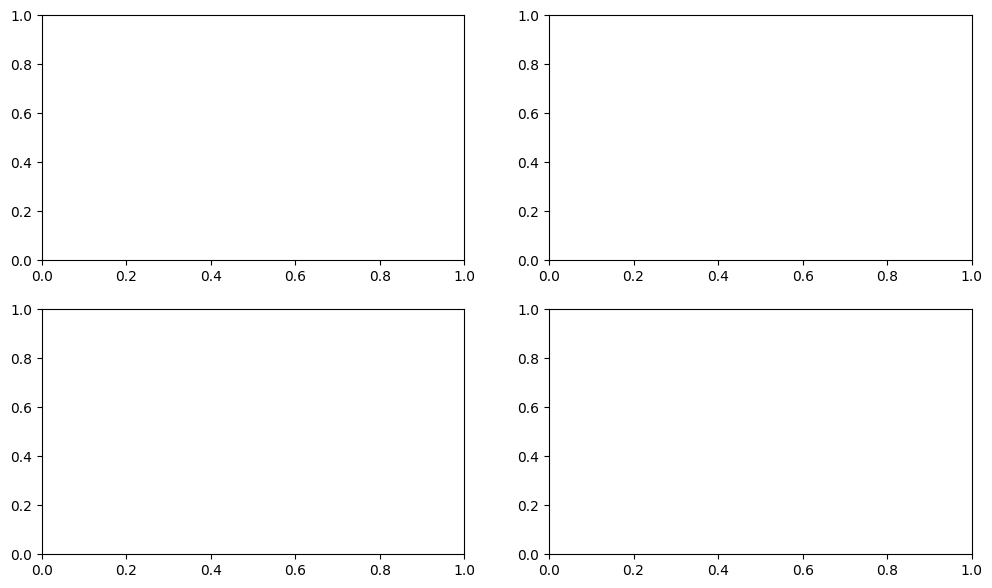

In [26]:
fig, axes = plt.subplots(2,2, figsize=(12,7))
th25_, th50_, th75_, promedio_, varianza_, mu_sigma_=estats(ensayos3_dfs)

In [27]:
for sujeto in ensayos3_dfs:
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
    
axes[1][0].plot(th25_,label='Percentil al 25%')
axes[1][0].plot(th50_,label='Percentil al 50%')
axes[1][0].plot(th75_,label='Percentil al 75%')
axes[1][0].plot(promedio_,label='Media')
axes[1][0].plot(varianza_,label='Varianza')
axes[1][0].plot(mu_sigma_,label='mu+sigma')
axes[1][0].legend()

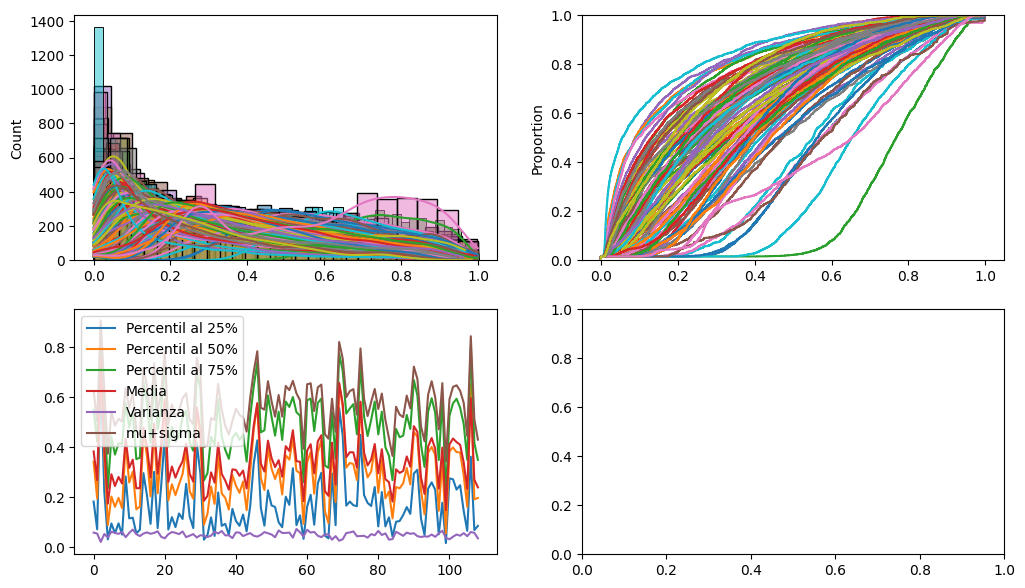

In [22]:
fig, axes=plt.subplots(2,2, figsize=(12,7))
th25_4, th50_4, th75_4, promedio_4, varianza_4, mu_sigma_4=estats(ensayos4_dfs)
for sujeto in ensayos4_dfs:
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])

axes[1][0].plot(th25_4,label='Percentil al 25%')
axes[1][0].plot(th50_4,label='Percentil al 50%')
axes[1][0].plot(th75_4,label='Percentil al 75%')
axes[1][0].plot(promedio_4,label='Media')
axes[1][0].plot(varianza_4,label='Varianza')
axes[1][0].plot(mu_sigma_4,label='mu+sigma')
axes[1][0].legend()

In [21]:
from scipy import stats
stats.median_abs_deviation(th25)

NameError: name 'th25' is not defined

In [ ]:
estadisticos_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'], 
                               index=['min', 'max', 'mediana'])
columnas = [th25, th50, th75, promedio, mu_sigma]
min_, max_, mediana_, cosa_ = [], [], [], []
for columna in columnas:
    d1, d2, d3, d4 = np.min(columna), np.max(columna), np.median(columna), stats.median_abs_deviation(columna)
    min_.append(d1)
    max_.append(d2)
    mediana_.append(d3)
    cosa_.append(d4)
estadisticos_df.loc['min'] = min_
estadisticos_df.loc['max'] = max_
estadisticos_df.loc['mediana'] = mediana_

In [28]:
min_, max_, mediana_, cosa_ = [], [], [], []
for idx, columna in enumerate(estadisticos_df.columns):
    d1, d2, d3, d4 = np.min(columnas[idx]), np.max(columnas[idx]), np.median(columnas[idx]), stats.median_abs_deviation(columnas[idx])
    estadisticos_df[columna] = [d1, d2, d3, d4]

NameError: name 'estadisticos_df' is not defined

In [ ]:
test_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'], 
                               index=['min', 'max', 'mediana', 'cosa_rara'])
estadísticos = [th25, th50, th75, promedio, mu_sigma]

In [ ]:
def capsula(lista_dfs, th, porcentaje_):
    stack = np.stack([df.values for df in lista_dfs])
    above = stack > th
    N = len(lista_dfs)
    count_above = above.sum(axis = 0)
    min_requerido = int(np.ceil(porcentaje_*N)) 
    result_bool = count_above >= min_requerido
    result_df = pd.DataFrame(result_bool, index=lista_dfs[0].index, columns=lista_dfs[0].columns)

    return result_df

resultado_df = capsula(ensayos_dfs, 0.5, 0.6)
plt.figure(figsize = (5, 3))
sns.heatmap(resultado_df)

In [ ]:
# evaluación de estadistico
resultado3_df1 = capsula(ensayos3_dfs, 0.3, 0.6)
resultado3_df2 = capsula(ensayos3_dfs, 0.3, 0.7)
resultado3_df3 = capsula(ensayos3_dfs, 0.5, 0.6)
resultado3_df4 = capsula(ensayos3_dfs, 0.5, 0.7)
fig, axes = plt.subplots(2,2, figsize = (10, 6))
sns.heatmap(resultado3_df1, ax=axes[0, 0])
sns.heatmap(resultado3_df2, ax=axes[0, 1])
sns.heatmap(resultado3_df3, ax=axes[1, 0])
sns.heatmap(resultado3_df4, ax=axes[1, 1])
axes[0,0].set_title("umbral = 0.3, población>60%", fontsize = 10)
fig.suptitle('Análisis 3')

In [29]:
resultado4_df1 = capsula(ensayos4_dfs, 0.3, 0.5)
resultado4_df2 = capsula(ensayos4_dfs, 0.3, 0.6)
resultado4_df3 = capsula(ensayos4_dfs, 0.3, 0.7) # *
resultado4_df4 = capsula(ensayos4_dfs, 0.3, 0.8)
fig, axes = plt.subplots(2,2, figsize = (10, 6))
sns.heatmap(resultado4_df1, ax=axes[0, 0])
sns.heatmap(resultado4_df2, ax=axes[0, 1])
sns.heatmap(resultado4_df3, ax=axes[1, 0])
sns.heatmap(resultado4_df4, ax=axes[1, 1])
axes[0,0].set_title("umbral = 0.3, población>50%", fontsize = 10)
fig.suptitle('Análisis estadísticos en el ensayo 4')


NameError: name 'capsula' is not defined

In [ ]:
def metricas_grafo(G):
    clust_coeff = nx.average_clustering(G)
    try:
        path_length = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        path_length = np.nan
    G_rand = nx.gnm_random_graph(n=G.number_of_nodes(), m=G.number_of_edges())
    clust_rand = nx.average_clustering(G_rand)
    path_rand = nx.average_shortest_path_length(G_rand)
    small_world_sigma = (clust_coeff / clust_rand) / (path_length / path_rand)
    from networkx.algorithms import community
    communities = community.greedy_modularity_communities(G)
    modularity = community.modularity(G, communities)
    degree_dict = dict(G.degree())
    betwenness = nx.betweenness_centrality(G)
    betwenness = sorted(betwenness.items(), key=lambda x: x[1], reverse = True)
    global_eff = nx.global_efficiency(G)
    local_eff = nx.local_efficiency(G)

    return  (clust_coeff, path_length, small_world_sigma, communities, modularity, betwenness, global_eff, local_eff, degree_dict)

In [30]:
ensayo3_grafo_ = nx.from_pandas_adjacency(resultado3_df3)
ensayo4_grafo_ = nx.from_pandas_adjacency(resultado4_df4)

NameError: name 'resultado3_df3' is not defined

In [ ]:
(clust_coeff_3, path_length_3, small_world_sigma_3, communities_3, 
 modularity_3, betwenness_3, global_eff_3, local_eff_3, degree_dict_3) = metricas_grafo(ensayo3_grafo_)
(clust_coeff_4, path_length_4, small_world_sigma_4, communities_4, 
 modularity_4, betwenness_4, global_eff_4, local_eff_4, degree_dict_4) = metricas_grafo(ensayo4_grafo_)

In [ ]:
eeg_coords = pd.read_csv(coordenadas_csv)
eeg_coords.set_index("canal", drop = True, inplace = True)
eeg_coords.loc["F5.", "y"]    

In [ ]:
x, y, z = eeg_coords["x"].values, eeg_coords["y"].values, eeg_coords["z"].values
hub = betwenness_[0]
fig = plt.figure(figsize=(4,4))
axes = [fig.add_subplot(1, 1, 1, projection = "3D")]
nodes_size = [30 if idx != hub[0] else 200 for idx in eeg_coords.index]
axes[0].scatter(x, y, z, alpha = 0.5)
for idx, (x_, y_, z_) in enumerate(zip(x, y, z)):
    axes[0].text(x_, y_, z_, eeg_coords.index[idx], fontsize = 10)
    if eeg_coords.index[idx] == hub[0]:
        axes[0].text(x_, y_, z_, "HUB", color = "pink", fontsize = 13)

In [ ]:
#comunidades, grafos
comunidad_prueba = communities_[2]
n1, n2 = list(comunidad_prueba)[0], list(comunidad_prueba)[1]
n1, n2
x, y, z = eeg_coords["x"].values, eeg_coords["y"].values, eeg_coords["z"].values
hub = betwenness_[0]
fig = plt.figure(figsize=(4,4))
axes = [fig.add_subplot(1, 1, 1, projection = "3d")]

nodes_size = [30 if idx != hub[0] else 200 for idx in eeg_coords.index]
axes[0].scatter(x, y, z, alpha = 0.5)
 
for idx, (x_, y_, z_) in enumerate(zip(x, y, z)):
    axes[0].text(x_, y_, z_, eeg_coords.index[idx], fontsize = 10)
    if eeg_coords.index[idx] == hub[0]:
        axes[0].text(x_, y_, z_, "HUB", color = "pink", fontsize = 13)
colores = ["purple", "blue", "red", "green", "pink"]
for n_comunidad, comunidad in enumerate(communities_):
    for idx in range(len(comunidad)-1):
        n1, n2 = list(comunidad)[idx], list(comunidad)[idx+1]
        # plotear arista
        x_ = [eeg_coords.loc[n1, "x"], eeg_coords.loc[n2, "x"]]
        y_ = [eeg_coords.loc[n1, "y"], eeg_coords.loc[n2, "y"]]
        z_ = [eeg_coords.loc[n1, "z"], eeg_coords.loc[n2, "z"]]
        axes[0].plot(x_, y_, z_, linewidth = 3, alpha = 0.4, color = colores[n_comunidad])
axes[0].set_title("Comunidades 3")

In [ ]:
# encapsulación

def grafo_comunidades(comunidades, Hub, coords, pos):
    x, y, z = coords["x"].values, coords["y"].values, coords["z"].values
    nodes_size = [30 if idx != Hub[0] else 200 for idx in coords.index]
    pos.scatter(x, y, z, alpha = 0.5)
    for idx, (x_, y_, z_) in enumerate(zip(x, y, z)):
        pos.text(x_, y_, z_, coords.index[idx], fontsize = 10)
        if coords.index[idx] == Hub[0]:
            pos.text(x_, y_, z_, "HUB", color = "pink", fontsize = 13) 
    colores = ["purple", "blue", "red", "green", "pink"]
    for n_comunidad, comunidad in enumerate(comunidades):
        for idx in range(len(comunidad)-1):
            n1, n2 = list(comunidad)[idx], list(comunidad)[idx+1]
            # plotear arista
            x_ = [coords.loc[n1, "x"], coords.loc[n2, "x"]]
            y_ = [coords.loc[n1, "y"], coords.loc[n2, "y"]]
            z_ = [coords.loc[n1, "z"], coords.loc[n2, "z"]]
            pos.plot(x_, y_, z_, linewidth = 3, alpha = 0.4, color = colores[n_comunidad])
    pos.set_title("Comunidades 3")
hub = betwenness_[0]

fig = plt.figure(figsize=(4,4))
axes = [fig.add_subplot(1, 1, 1, projection = "3D")]
grafo_comunidades(communities_, hub, eeg_coords, axes[0])

In [ ]:
def grafo_3d(Hub, coords, pos):
    x, y, z =coords["x"].values, coords["y"].values, coords["z"].values
    nodes_size = [30 if idx != Hub[0] else 200 for idx in coords.index]
    pos.scatter(x, y, z, alpha = 0.5)
    for idx, (x_, y_, z_) in enumerate(zip(x, y, z)):
        pos.text(x_, y_, z_, coords.index[idx], fontsize = 10)
        if coords.index[idx] == hub[0]:
            pos.text(x_, y_, z_, "HUB", color = "pink", fontsize = 13)
hub = betwenness_[0]

fig = plt.figure(figsize=(4,4))
axes = [fig.add_subplot(1, 1, 1, projection = "3D")]
grafo_3d(hub, eeg_coords, axes[0])

In [ ]:
def grafo_2d(ensayo_df, pos):
    ensayo_grafo_ = nx.from_pandas_adjacency(ensayo_df)
    nx.draw_circular(ensayo_grafo, with_labels = True, font_size = 7.5, ax = pos)
    return ensayo_grafo_
fig = plt.figure(figsize=(10, 4))
axes = [fig.add_subplot(1, 2, 1)]
grafo_2d(resultado_df4, axes[0])

In [ ]:
hub = betwenness_3[0]
fig = plt.figure(figsize=(12, 8))
axes = [fig.add_subplot(2, 2, 1, projection = "3D"),
       fig.add_subplot(2, 2, 2, projection = "3D"),
       fig.add_subplot(2,2,3)]
grafo_comunidades(communities_3, hub, eeg_coords, axes[0])
grafo_3d(hub, eeg_coords, axes[1])
ensayo_grafo = grafo_2d(resultado3_df4, axes[2])
hub = betwenness_4[0]

fig = plt.figure(figsize=(12, 8))
axes = [fig.add_subplot(2, 2, 1, projection = "3D"),
       fig.add_subplot(2, 2, 2, projection = "3D"),
       fig.add_subplot(2,2,3)]
grafo_comunidades(communities_4, hub, eeg_coords, axes[0])
grafo_3d(hub, eeg_coords, axes[1])
ensayo_grafo = grafo_2d(resultado4_df4, axes[2])